In [5]:
import warnings
warnings.filterwarnings('ignore')
from TabTransformer.model import Tab_Transformer
from configs import *
import pandas as pd
from yaml.loader import SafeLoader
import typing
import yaml

In [6]:
def load_config(path: str) -> typing.Dict:
    with open(path, "r") as f:
        config = yaml.load(f, Loader=SafeLoader)
    return config

In [7]:
hypeparameter = load_config('setting/hyp_tabtransformer.yaml')

In [8]:
X_train= pd.read_csv(PATH_TRAIN)
X_val=pd.read_csv(PATH_VAL)
X_test=pd.read_csv(PATH_TEST)

In [9]:
model = Tab_Transformer(
   c_feature=CATEGORICAL_FEATURES, 
   vocab_c_feature=VOCAB,
   n_feature=NUMERIC_FEATURES,
   hyperparameters=hypeparameter
)

  0%|          | 0/8 [00:00<?, ?it/s]2023-01-18 09:41:27.922574: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:
2023-01-18 09:41:27.923086: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublas.so.11'; dlerror: libcublas.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:
2023-01-18 09:41:27.923446: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcublasLt.so.11'; dlerror: libcublasLt.so.11: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /usr/local/cuda-11.6/lib64:
2023-01-18 09:41:27.923819: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc

## 1. Training

In [7]:
history = model.train(
    train_data=X_train,
    val_data=X_val,
)

>> Training ................
Epoch 1/100
51/51 [==============================] - ETA: 0s - loss: 0.8112 - PR AUC: 0.3824
Epoch 1: saving model to artifact/weights/tabtransform_1674052283.4792285/
51/51 [==============================] - 9s 93ms/step - loss: 0.8112 - PR AUC: 0.3824 - val_loss: 0.4205 - val_PR AUC: 0.6132
Epoch 2/100
51/51 [==============================] - ETA: 0s - loss: 0.6213 - PR AUC: 0.5238
Epoch 2: saving model to artifact/weights/tabtransform_1674052283.4792285/
51/51 [==============================] - 4s 80ms/step - loss: 0.6213 - PR AUC: 0.5238 - val_loss: 0.4106 - val_PR AUC: 0.6410
Epoch 3/100
51/51 [==============================] - ETA: 0s - loss: 0.5510 - PR AUC: 0.5605
Epoch 3: saving model to artifact/weights/tabtransform_1674052283.4792285/
51/51 [==============================] - 4s 81ms/step - loss: 0.5510 - PR AUC: 0.5605 - val_loss: 0.4132 - val_PR AUC: 0.6558
Epoch 4/100
51/51 [==============================] - ETA: 0s - loss: 0.4975 - PR AUC: 0.5

## 2. Evaluation

In [10]:
model.load_model('artifact/weights/tabtransform_1674052283.4792285/')

In [11]:
model.test_model(test_data=X_test)

32/32 [==============================] - 2s 29ms/step
Test ROC AUC: 0.8962
Test PR AUC: 0.7361
Test Accuracy: 0.8479
F1 score: 0.7653
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     12435
           1       0.75      0.54      0.63      3846

    accuracy                           0.85     16281
   macro avg       0.81      0.74      0.77     16281
weighted avg       0.84      0.85      0.84     16281



In [12]:
import pickle
import matplotlib.pyplot as plt
with open('artifact/history/tabtransform_1674052283.4792285.pkl', 'rb') as f:
    history = pickle.load(f)

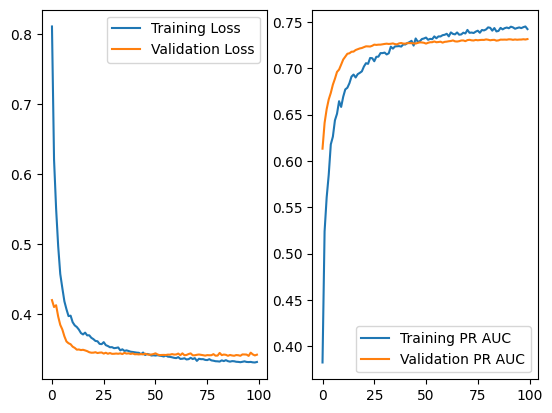

In [13]:
fig, ax = plt.subplots(nrows=1, ncols=2)

ax[0].plot(history['loss'], label='Training Loss')
ax[0].plot(history['val_loss'], label='Validation Loss')
ax[0].legend()

ax[1].plot(history['PR AUC'], label='Training PR AUC')
ax[1].plot(history['val_PR AUC'], label='Validation PR AUC')
ax[1].legend()

plt.show()


## 3. Inference

In [14]:
inputs = {
    'age': 25.0,
    'workclass': 'Private',
    'fnlwgt': 226802.0,
    'education': '11th',
    'education_num': 7.0,
    'marital_status': 'Never-married',
    'occupation': 'Machine-op-inspct',
    'relationship': 'Own-child',
    'race': 'black',
    'gender': 'Male',
    'capital_gain': 0.0,
    'capital_loss': 0.0,
    'hours_per_week': 40.0,
    'native_country': 'United-States',
    'income_bracket': ''
}

In [16]:
preds = model.inference(inputs)

1/1 [==============================] - 0s 25ms/step


In [17]:
print(preds)

0.14538951218128204
